In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_calendar = pd.read_csv("data/calendar_pred.csv")

In [3]:
df_calendar = df_calendar[df_calendar['available'] == 't']

In [4]:
df_listings = pd.read_csv("data/listings_pred.csv")

In [5]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 80 columns):
id                                  3817 non-null int64
listing_url                         3817 non-null object
name                                3817 non-null object
summary                             3640 non-null object
space                               3248 non-null object
description                         3817 non-null object
neighborhood_overview               2785 non-null object
notes                               2211 non-null object
transit                             2883 non-null object
thumbnail_url                       3497 non-null object
medium_url                          3497 non-null object
picture_url                         3817 non-null object
xl_picture_url                      3497 non-null object
host_id                             3817 non-null int64
host_url                            3817 non-null object
host_name                           3815

In [6]:
neighbourhood = df_listings['neighbourhood_group_cleansed'].unique()
print(neighbourhood)

['Queen Anne' 'Ballard' 'Other neighborhoods' 'Cascade' 'Central Area'
 'University District' 'Downtown' 'Magnolia' 'West Seattle' 'Interbay'
 'Beacon Hill' 'Rainier Valley' 'Delridge' 'Seward Park' 'Northgate'
 'Capitol Hill' 'Lake City']


In [7]:
# have a look at missing values 
a = df_listings.isnull().sum()
a[df_listings.isnull().sum()> 0]

summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      858
host_response_time              523
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              299
host_listings_count               2
host_total_listings_count         2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   415
zipcode                           7
property_type                     1
bathrooms                        16
bedrooms                          6
beds                              1
square_feet                 

In [8]:
df_listings["host_response_rate"] = df_listings["host_response_rate"] /100

## Overview of data

In [9]:
# get min max mean price

min_price = df_listings['total_price'].min()
max_price = df_listings['total_price'].max()
mean_price = df_listings['total_price'].mean()

print("min price is ${:}".format(min_price))
print("max price is ${:}".format(max_price))
print("mean price is ${:}".format(mean_price))

min price is $20
max price is $1275
mean price is $173.07440398218498


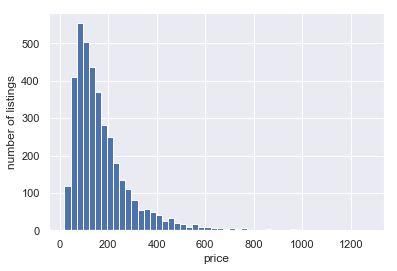

<Figure size 432x288 with 0 Axes>

In [96]:
ax = df_listings['total_price'].plot.hist(bins=50)
ax.set_xlabel('price')
ax.set_ylabel('number of listings')
plt.show()
plt.savefig("price_hist.png")

In [29]:
df_listings['total_price'].quantile([.2,.4, .6, .8])

0.2     81.0
0.4    120.0
0.6    164.0
0.8    240.0
Name: total_price, dtype: float64

In [72]:
df_listings['total_price'].quantile(.75)

211.0

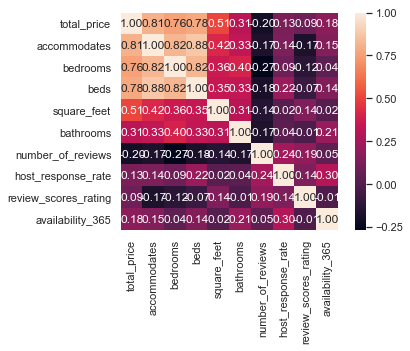

In [97]:
# heatmap


cols = ['total_price','accommodates','bedrooms','beds','square_feet','bathrooms','number_of_reviews',
        'host_response_rate','review_scores_rating','availability_365']
df_dropna  = df_listings.dropna(subset=cols)
corrs = np.corrcoef(df_dropna[cols].values.T)
sns.set(font_scale=1)
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols)

plt.savefig("corr.png")

## Time infomation

In [13]:
df_calendar = df_calendar[df_calendar['available'] == 't']

In [14]:
average_price_by_month = df_calendar.groupby(['month'])['price'].mean()

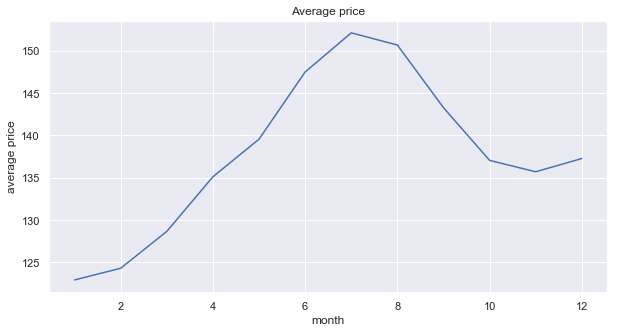

In [98]:
plt.figure(figsize=(10,5))
plt.plot(average_price_by_month)
plt.ylabel('average price')
plt.xlabel('month')
plt.title('Average price')
plt.savefig("price_vs_month.png")

## Visualize location infomation

/Users/shixinzheng/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


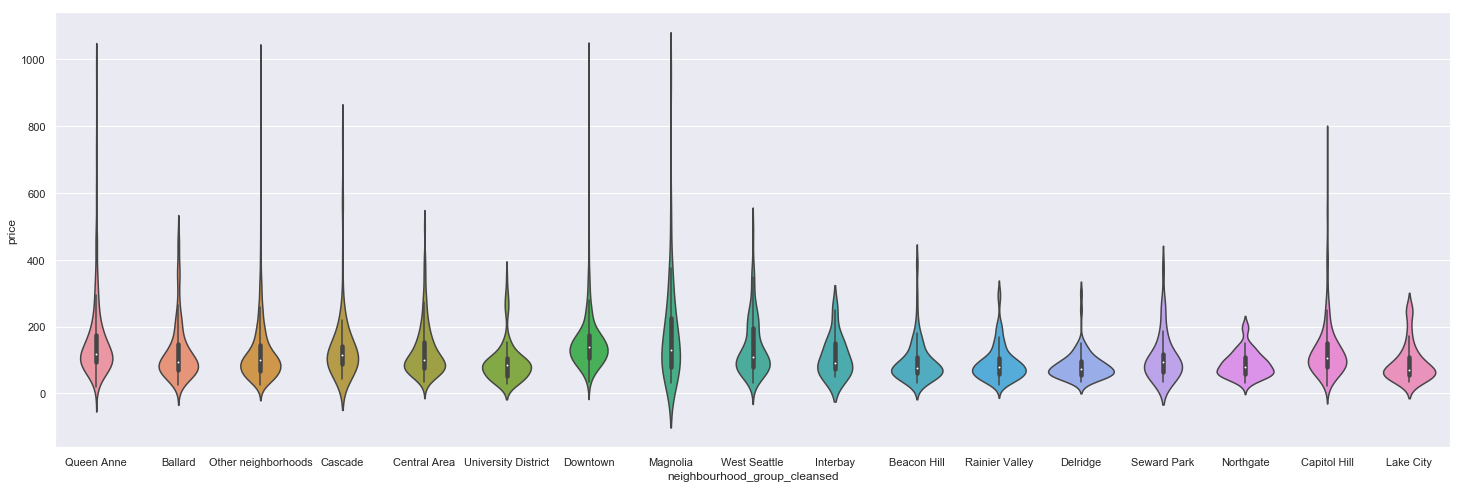

In [99]:
#creating a sub-dataframe with no extreme values / less than 500
#using violinplot to showcase density and distribtuion of prices 
plt.figure(figsize=(25,8))
viz_2=sns.violinplot(data=df_listings, x='neighbourhood_group_cleansed', y='price')
# viz_2.set_title('Density and distribution of prices for each neighberhood_group')
plt.savefig("neighbor_violin.png")

In [30]:
df_listings['total_price_cat'] = pd.cut(df_listings.total_price,bins=[0,100,200,400,1280],labels=['cheap: <100','medium: 100~200','expensive: 200~400','luxury: >400'])

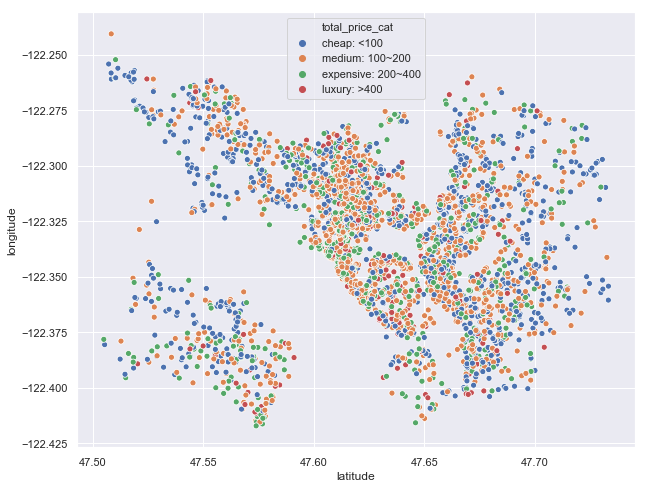

In [100]:
plt.figure(figsize=(10,8))
sns.scatterplot(df_listings.latitude,df_listings.longitude,hue=df_listings.total_price_cat)
plt.savefig("price_cat_map.png")

274.0


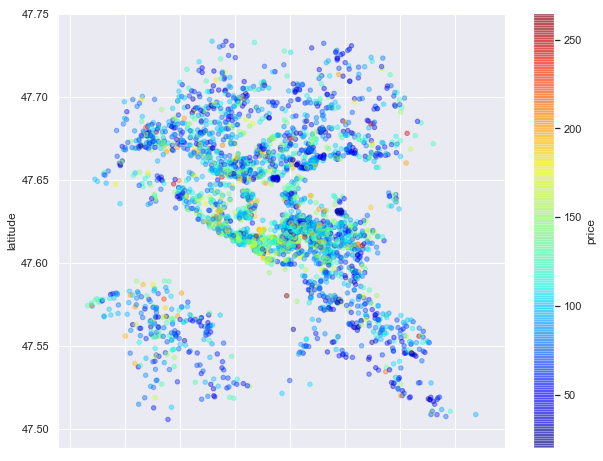

In [101]:
# plt.figure(figsize=(10,8))
#let's see how scatterplot will come out 
print(df_listings['total_price'].quantile(.85))
df_listings[df_listings.total_price< df_listings['total_price'].quantile(.85) ].plot(kind='scatter', x='longitude', y='latitude', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,figsize=(10,8))
# viz_4.legend()
plt.savefig("price_heat_map")

## Room size infomation

Text(0.5,1,'No. of bedrooms vs price')

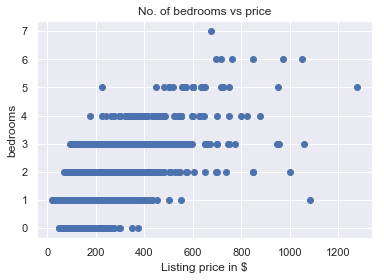

In [24]:
plt.scatter(df_listings['total_price'],df_listings['bedrooms'])
plt.ylabel('bedrooms')
plt.xlabel('Listing price in $')
plt.title('No. of bedrooms vs price')

Text(0.5,1,'No. of accommodates vs price')

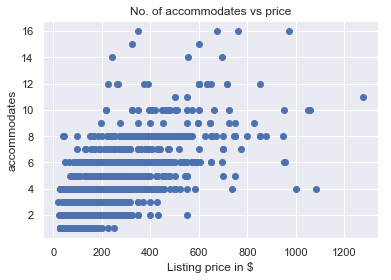

In [25]:
plt.scatter(df_listings['total_price'],df_listings['accommodates'])
plt.ylabel('accommodates')
plt.xlabel('Listing price in $')
plt.title('No. of accommodates vs price')

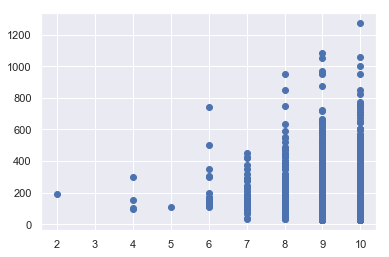

In [26]:
df = df_listings.dropna(axis=0,subset=['review_scores_value','price'])
plt.scatter(df_listings['review_scores_value'],df_listings['total_price'])

/Users/shixinzheng/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


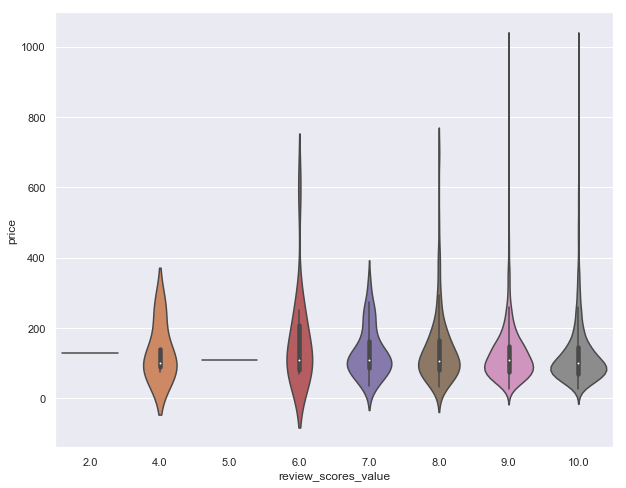

In [27]:
plt.figure(figsize=(10,8))
viz_2=sns.violinplot(data=df_listings[df_listings.total_price>0], x='review_scores_value', y='price')